In [1]:
from random_stock_price_generator import RandomStockPrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

In [2]:
rp = RandomStockPrices(num_assets=1000, start_date='2016-01-01', num_days = 252)
returns = rp.returns
prices = rp.prices

In [3]:
prices.tail()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
2016-12-13,65.321508,51.054654,81.029207,63.057633,85.482642,59.248398,5.992558,12.225080,75.713527,7.336487,...,32.657791,13.216143,141.653693,32.814938,41.931190,163.098451,76.687324,54.895821,26.359529,172.301649
2016-12-14,64.375342,51.609208,81.741890,63.266826,85.282431,58.601670,5.954488,12.336280,76.481526,7.296344,...,32.578774,13.271367,143.619820,32.821671,42.666128,163.268526,76.598044,54.427639,26.615488,172.864368
2016-12-15,62.080280,51.744170,81.083423,63.271223,85.837435,58.384160,5.961529,12.314425,76.942153,7.326565,...,32.393671,13.628232,143.897143,32.770921,43.124429,161.834959,76.870900,55.259742,27.034060,173.436995
2016-12-16,61.965205,52.401941,80.335290,62.460638,86.665281,58.916873,5.953482,12.327585,77.370188,7.388155,...,32.026427,13.838987,145.154916,32.320755,42.794617,161.466249,76.857457,54.729288,27.106361,174.803024
2016-12-19,62.056305,51.973686,80.184616,62.263937,86.677199,58.996856,6.026853,12.312984,77.533124,7.390987,...,32.198105,13.703732,144.260773,31.958547,42.098701,162.656273,77.317537,55.553205,27.276943,174.986965


## Taking a look at the first price path for daily returns

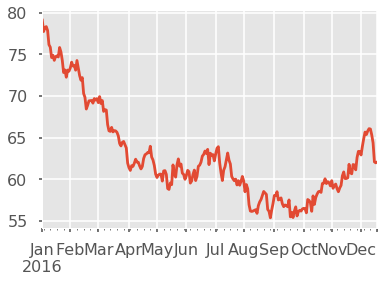

In [4]:
ticker = 'TICK0'
prices[ticker].plot()

In [5]:
def resample_prices(prices, freq='M'):
    '''
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    '''
    return prices.resample(freq).last()

## Resampling to monthly returns

In [6]:
resampled = resample_prices(prices)
resampled.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
2016-01-31,72.982015,40.415537,80.513818,61.426456,77.977134,65.304289,9.942360,11.727877,84.627538,7.922821,...,28.187071,16.158473,117.231362,31.541332,42.324188,169.023215,72.843055,55.706846,28.804619,148.748001
2016-02-29,69.686337,42.490995,85.234556,58.394773,80.287572,67.136716,10.297263,11.934212,83.445163,7.701485,...,29.180892,15.796224,121.324084,31.727441,43.252300,165.371416,72.003760,56.566059,28.089295,151.875019
2016-03-31,61.937657,41.662240,75.826135,60.173065,77.522537,64.341603,10.302071,12.756077,80.945581,7.880706,...,29.282753,17.202433,117.688281,30.220768,40.218769,169.118006,72.173073,58.394803,25.262922,159.833150
2016-04-30,60.598450,41.422666,77.703218,56.859908,83.317312,64.277333,9.299989,12.819456,77.225982,7.752272,...,30.058037,17.986851,118.855294,29.665166,39.346471,167.532357,76.013679,59.444736,24.494153,161.993874
2016-05-31,59.984913,41.773035,87.984768,55.257421,82.548051,64.579968,10.166586,12.636739,79.694714,7.564994,...,29.876510,18.599387,111.525982,29.649386,39.768551,169.155849,78.247674,56.966917,28.158903,163.443874


## Taking a second look at the first stock with monthly and daily returns

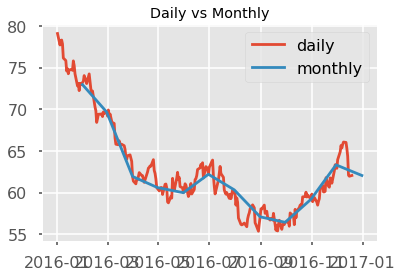

In [7]:
plt.plot(prices.loc[:,ticker])
plt.plot(resampled.loc[:,ticker])
plt.title('Daily vs Monthly')
plt.legend(['daily', 'monthly'])

In [8]:
def compute_log_returns(prices):
    '''
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    '''
    shifted = prices.shift()
    return np.log(prices/shifted).fillna(0)

In [9]:
log_returns = compute_log_returns(resampled)
log_returns.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
2016-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-02-29,-0.046209,0.050078,0.056978,-0.050614,0.029199,0.027673,0.035074,0.017441,-0.014070,-0.028334,...,0.034651,-0.022674,0.034316,0.005883,0.021692,-0.021842,-0.011589,0.015306,-0.025147,0.020804
2016-03-31,-0.117876,-0.019697,-0.116964,0.029998,-0.035046,-0.042525,0.000467,0.066599,-0.030413,0.023004,...,0.003485,0.085280,-0.030426,-0.048653,-0.072717,0.022403,0.002349,0.031818,-0.106051,0.051073
2016-04-30,-0.021859,-0.005767,0.024454,-0.056634,0.072088,-0.000999,-0.102332,0.004956,-0.047041,-0.016432,...,0.026131,0.044590,0.009867,-0.018556,-0.021927,-0.009420,0.051846,0.017820,-0.030903,0.013428
2016-05-31,-0.010176,0.008423,0.124267,-0.028588,-0.009276,0.004697,0.089093,-0.014356,0.031467,-0.024454,...,-0.006058,0.033488,-0.063649,-0.000532,0.010670,0.009644,0.028966,-0.042576,0.139429,0.008911


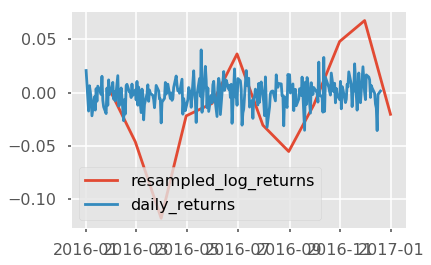

In [10]:
plt.plot(log_returns.loc[:, ticker])
plt.plot(returns.loc[:, ticker])
plt.legend(['resampled_log_returns', 'daily_returns'])

## Previous and Lookahead returns

In [11]:
previous_returns = log_returns.shift(1).dropna()
lookahead_returns = log_returns.shift(-1).dropna()

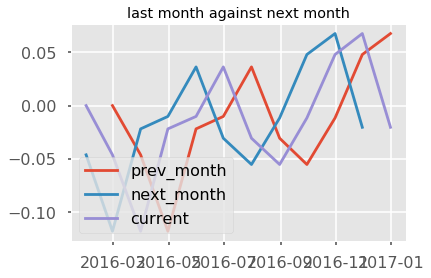

In [12]:
plt.plot(previous_returns.loc[:, ticker])
plt.plot(lookahead_returns.loc[:, ticker])
plt.plot(log_returns.loc[:, ticker])
plt.title('last month against next month')
plt.legend(['prev_month', 'next_month', 'current'])

## Generate Trading Signal
We will use previous returns to determine which stocks to buy and which to sell

In [13]:
def get_top_n(prev_returns, top_n):
    '''
    Select the top performing stocks.
    
    Parameters
    ----------
    prev_returns: pd.DataFrame
        previous shifted returns for each ticker and date
    top_n: int
        The number of top performing stocks to get
        
    Returns
    -------
    top_stocks: pd.DataFrame
        Top <top_n> stocks for each day marked with a 1
    '''
    top_stocks = prev_returns.copy()
    for index, row in prev_returns.iterrows():
        top_returns = row.nlargest(top_n).index
        # set all to zero
        top_stocks.loc[index] = 0
        
        for x in top_returns:
            top_stocks.at[index, x] = 1

    return top_stocks.astype('int64')

Text(0.5, 1.0, 'Most Shorted Stocks')

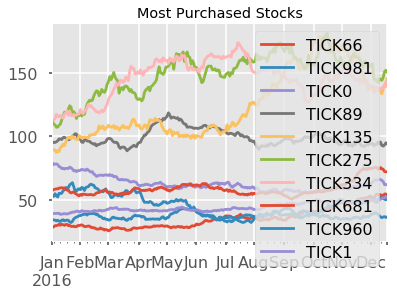

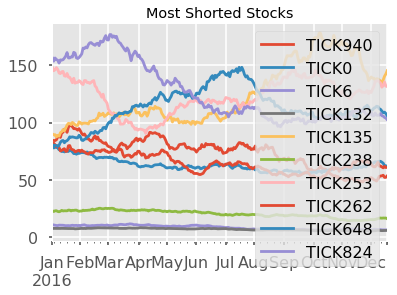

In [14]:
n_stocks = 1
long_stocks = get_top_n(previous_returns, n_stocks)
short_stocks = get_top_n(-1*previous_returns, n_stocks)

top_tickers = long_stocks.sum().nlargest(10)  
worst_tickers = short_stocks.sum().nlargest(10)
prices[top_tickers.index].plot()
plt.title('Most Purchased Stocks')
prices[worst_tickers.index].plot()
plt.title('Most Shorted Stocks')

## Checking results

In [15]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    '''
    Compute expected returns for the portfolio assuming equal investment in each long/short stock
    
    Parameters
    ----------
    df_long: pd.DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short: pd.DataFrame
        Worst stocks for each ticker and date marked with a 1
    lookahead_returns: pd.DataFrame
        contains returns for the next period on the current day
    n_stocks: int
        The number of stocks chosen for each month
        
    Returns
    -------
    portfolio_returns: pd.DataFrame
        Expected portfolio returns for each ticker and date
    '''
    
    longs = df_long * lookahead_returns
    shorts = df_short * -lookahead_returns
    result = longs + shorts
    return result/n_stocks

Text(0.5, 1.0, 'Total returns each day')

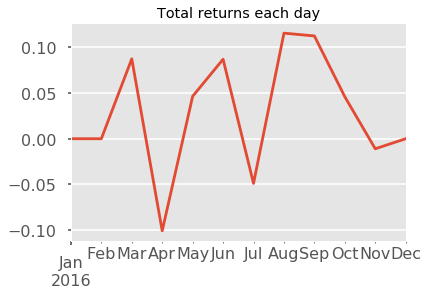

In [16]:
port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
port_returns.T.sum().dropna().plot()
plt.title('Total returns each day')

## Statistical Tests

In [17]:
expected_portfolio_returns_by_date = port_returns.sum(axis=1).dropna()
expected_portfolio_returns_by_date.head()

2016-01-31    0.000000
2016-02-29    0.000000
2016-03-31    0.087485
2016-04-30   -0.100875
2016-05-31    0.046479
Freq: M, dtype: float64

In [18]:
portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
print('''
Mean Daily Return:     {:.6f}
Standard Error:        {:.6f}
Annual Rate of Return: {:.2f}%
'''.format(portfolio_mean_ret, portfolio_ste_ret, annualized_mean_return))


Mean Daily Return:     0.027872
Standard Error:        0.019253
Annual Rate of Return: 39.72%



### T-Test
My null hypothesis ($H_0$) is that the actual mean return from the signal is zero. I'll perform a one-sample, one-sided t-test on the observed mean return, to see if I can reject $H_0$.

I'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, I'll use $\alpha = 0.05$, since it's a common value to use.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so I'll divide the p-value by 2 to get 1-sided p-value

In [19]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    '''
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date: pd.DataFrame
        Expected portfolio returns by date
        
    Returns
    -------
    t_value: float
        T-statistic from the t-test
    p_value: float
        Corresponding p-value
    '''
    
    t, p = stats.ttest_1samp(expected_portfolio_returns_by_date, 0.0)
    return t, p/2

In [20]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print('''
Alpha analysis:
    t-value:     {:.3f}
    p-value:     {:.3f}
'''.format(t_value, p_value))


Alpha analysis:
    t-value:     1.448
    p-value:     0.088



## Results
The returns and p-values are not impressive and show there is no alpha here. Using the RandomStockPrices generator with a default mean of 0.05 and default standard deviation of all of the underlying distributions being from 0.10 to 0.50.

Next I will put all of the above into one function, where I can tweak the random price distributions and lower the standard deviation range from (0.10, 0.50) to (0.01, 0.05). This should produce better results.

In [21]:
def momentum_test(stock_universe_dist_mean=0.05, n_stocks=10, freq='M'):
    '''
    Function to combine all of the above and where we can manipulate the underlying stock distributions and prints the results
    
    Parameters
    ----------
    stock_universe_dist_mean: float
        the mean of all of the stock return distributions' means
    n_stocks: int
        the number of stocks to buy(sell) each period
    freq: string
        frequency of rebalancing
        
    Returns
    -------
    None
    '''
    
    rp = RandomStockPrices(num_assets=1000, start_date='2016-01-01', num_days = 756,
                           mean_mean=stock_universe_dist_mean)
    prices = rp.prices
    resampled_returns = resample_prices(prices, freq=freq)
    log_returns = compute_log_returns(resampled_returns)
    previous_returns = log_returns.shift(1).dropna()
    lookahead_returns = log_returns.shift(-1).dropna()
    long_stocks = get_top_n(previous_returns, n_stocks)
    short_stocks = get_top_n(-1*previous_returns, n_stocks)
    port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
    expected_portfolio_returns_by_date = port_returns.sum(axis=1).dropna()
    portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
    portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
    annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
    print('''
    Mean Daily Return:     {:.6f}
    Standard Error:        {:.6f}
    Annual Rate of Return: {:.2f}%
    '''.format(portfolio_mean_ret, portfolio_ste_ret, annualized_mean_return))
    t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
    print('''
    Alpha analysis:
        t-value:     {:.3f}
        p-value:     {:.3f}
    '''.format(t_value, p_value))

In [22]:
# First test, the usual parameters
momentum_test(stock_universe_dist_mean=0.05, n_stocks=10, freq='M')


    Mean Daily Return:     -0.004348
    Standard Error:        0.002791
    Annual Rate of Return: -5.08%
    

    Alpha analysis:
        t-value:     -1.558
        p-value:     0.064
    


In [23]:
# changing to daily it looks worse...
momentum_test(stock_universe_dist_mean=0.05, n_stocks=10, freq='D')


    Mean Daily Return:     0.000044
    Standard Error:        0.000051
    Annual Rate of Return: 0.05%
    

    Alpha analysis:
        t-value:     0.869
        p-value:     0.192
    


In [29]:
# changing to only 1 stock each period and going back to monthly
momentum_test(stock_universe_dist_mean=0.05, n_stocks=1, freq='M')


    Mean Daily Return:     0.005426
    Standard Error:        0.009240
    Annual Rate of Return: 6.73%
    

    Alpha analysis:
        t-value:     0.587
        p-value:     0.280
    


In [30]:
# Changing to trading the entire universe greatly reduces the standard error
momentum_test(stock_universe_dist_mean=0.05, n_stocks=500, freq='M')


    Mean Daily Return:     0.000689
    Standard Error:        0.000269
    Annual Rate of Return: 0.83%
    

    Alpha analysis:
        t-value:     2.558
        p-value:     0.008
    


In [31]:
# trying to use more historical information by using 2M frequency
momentum_test(stock_universe_dist_mean=0.05, n_stocks=500, freq='2M')


    Mean Daily Return:     0.001939
    Standard Error:        0.000543
    Annual Rate of Return: 2.35%
    

    Alpha analysis:
        t-value:     3.574
        p-value:     0.001
    


In [32]:
# trying 3M freq
momentum_test(stock_universe_dist_mean=0.05, n_stocks=500, freq='3M')


    Mean Daily Return:     0.001188
    Standard Error:        0.000840
    Annual Rate of Return: 1.44%
    

    Alpha analysis:
        t-value:     1.414
        p-value:     0.091
    


In [35]:
# lowering the number of stocks and using 4M freq
momentum_test(stock_universe_dist_mean=0.05, n_stocks=100, freq='4M')


    Mean Daily Return:     0.007733
    Standard Error:        0.003108
    Annual Rate of Return: 9.72%
    

    Alpha analysis:
        t-value:     2.488
        p-value:     0.017
    


In [37]:
# lower the number of stocks again and using 6M
momentum_test(stock_universe_dist_mean=0.05, n_stocks=100, freq='6M')


    Mean Daily Return:     0.001247
    Standard Error:        0.001620
    Annual Rate of Return: 1.51%
    

    Alpha analysis:
        t-value:     0.770
        p-value:     0.235
    


## Conclusion
Looks like its best to trade more stocks, but if that is too pricey maybe using 200 stocks (100 long and 100 short). Using more historical data (2M or 3M+) seems like it might be better which makes sense, since we are artificially generating the stocks' returns from a distribution, so here the past is a predictor of the future.